## EDA
- найти ключевые инсайты в данных
- рассмотреть взаимосвязи между датасетами (triggers и actions) и понять, как можно использовать данные в них для генерации фичей
- визуализация данных


In [1]:
!pip install polars
import pandas as pd
import polars as pl
import numpy as np
import scipy as sp
import tqdm
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
sns.set(style='white')
%matplotlib inline



In [4]:
# Import both of the datasets
#%cd /content/drive/My Drive/Colab Notebooks/

df_triggers = pl.read_csv('triggers.csv')
df_actions = pl.read_csv('actions.csv')


In [ ]:
# Check for the size of the dataframes
df_triggers.shape, df_actions.shape

((43074627, 4), (378204, 3))

Просмотрим оба датасета более детально

In [ ]:
df_actions.head()

guid,date,result
str,str,i64
"""0187a45c-6784-7e2f-5d84-f3c89d…","""2024-05-20 08:28:13""",0
"""0187a45d-650b-4a4f-ea59-943255…","""2024-05-31 08:19:10""",0
"""018ba1bd-3c62-0269-e77f-655655…","""2024-05-13 09:01:37""",0
"""018efb50-1738-e3af-58e8-0550e9…","""2024-05-22 05:18:46""",0
"""0187a45c-7aa1-3ec6-3c68-c86cb9…","""2024-05-10 16:18:53""",0


In [ ]:
df_triggers.head()

guid,date,trigger,type
str,str,i64,i64
"""018bdd75-83fc-2510-50e7-153f7b…","""2024-05-31 23:55:27""",2047,2
"""0187a472-becb-7994-5e1e-f179b6…","""2024-05-31 23:55:27""",168,2
"""018ba175-9e02-8c7a-e522-6e5fec…","""2024-05-31 23:55:26""",1807,2
"""018ba175-9e02-8c7a-e522-6e5fec…","""2024-05-31 23:55:26""",2048,2
"""018e9cfb-c8bc-f38b-e209-5a77c5…","""2024-05-31 23:55:26""",1773,2


In [ ]:
# See all of the main statistics of the datasets

df_triggers.describe()

statistic,guid,date,trigger,type
str,str,str,f64,f64
"""count""","""43074627""","""43074627""",4.3074627e7,4.3074627e7
"""null_count""","""0""","""0""",0.0,0.0
"""mean""",null,null,450.062455,1.170979
"""std""",null,null,702.796814,0.382913
"""min""","""0187808e-d664-cc1d-403d-b93ac1…","""2024-05-01 00:03:38""",0.0,1.0
"""25%""",null,null,60.0,1.0
"""50%""",null,null,155.0,1.0
"""75%""",null,null,243.0,1.0
"""max""","""018fd0f4-cd21-0f96-0e44-970578…","""2024-05-31 23:55:27""",3008.0,3.0


In [ ]:
df_actions.describe()

statistic,guid,date,result
str,str,str,f64
"""count""","""378204""","""378204""",378204.0
"""null_count""","""0""","""0""",0.0
"""mean""",null,null,0.02945
"""std""",null,null,0.169064
"""min""","""0187808f-1de0-735d-6e69-0d52a0…","""2024-05-01 00:05:59""",0.0
"""25%""",null,null,0.0
"""50%""",null,null,0.0
"""75%""",null,null,0.0
"""max""","""018fd0f4-cd21-0f96-0e44-970578…","""2024-05-31 23:57:14""",1.0


In [ ]:
# check for missing values
df_triggers.select(
    pl.col('guid').is_null(),
    pl.col('date').is_null(),
    pl.col('trigger').is_null(),
    pl.col('type').is_null()
).sum()

guid,date,trigger,type
u32,u32,u32,u32
0,0,0,0


In [ ]:
df_actions.select(
    pl.col('guid').is_null(),
    pl.col('date').is_null(),
    pl.col('result').is_null()
).sum()

guid,date,result
u32,u32,u32
0,0,0


- Пропущенные значения отсутствуют в обоих датасетах

In [ ]:
# Convert float and int64 vals to pl.int32, str to datetime

df_triggers = df_triggers.with_columns(pl.col('trigger').cast(pl.Int32),
                                       pl.col('type').cast(pl.Int32),
                                       pl.col('date').str.strptime(pl.Datetime, format='%Y-%m-%d %H:%M:%S'))
df_actions = df_actions.with_columns(pl.col('result').cast(pl.Int32),
                                     pl.col('date').str.strptime(pl.Datetime, format='%Y-%m-%d %H:%M:%S'))

In [ ]:
df_actions['result'].value_counts()

result,count
i32,u32
0,367066
1,11138


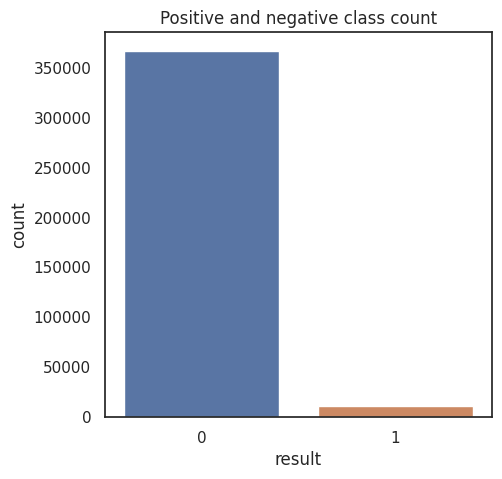

In [ ]:
# plot the result column count

fig = plt.figure(figsize=(5, 5))
bar_labels = ['0', '1']
sns.barplot(df_actions['result'].value_counts(),
            x='result',
            y='count',
           palette=sns.color_palette())
plt.title('Positive and negative class count', fontsize=12);

- Заметен достаточно сильный дизбаланс классов целевой переменной

In [ ]:
# check for the percentage of the positive class wrt to the negative

disbalance = df_actions['result'].value_counts().filter(pl.col('result') == 1)['count'][0] / \
             df_actions['result'].value_counts().filter(pl.col('result') == 0)['count'][0]

print(f"Ratio of classes is {disbalance * 100}")

Ratio of classes is 3.034331700566111


- Всего лишь 3% от общего количества взаимодействий привели к положительному отклику от пользователя

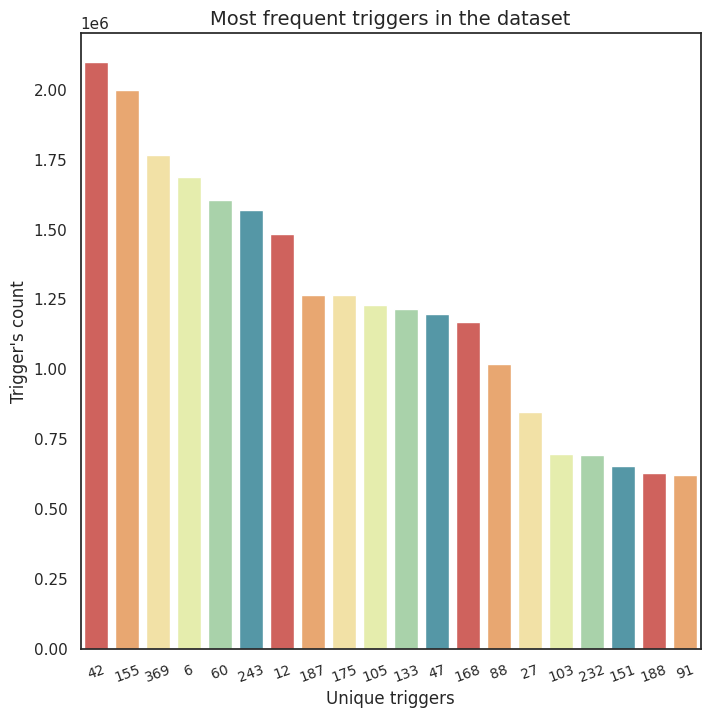

In [ ]:
# Let's plot 20 most frequent triggers

freq_triggers = df_triggers['trigger'].value_counts().sort(by='count', descending=True)[:20]
freq_triggers = freq_triggers.with_columns(pl.col('trigger').cast(pl.String))

figure = plt.figure(figsize=(8, 8))
sns.barplot(freq_triggers,
            x='trigger',
            y='count',
           orient='v',
           palette=sns.color_palette('Spectral'))
plt.xlabel('Unique triggers', fontsize=12)
plt.ylabel("Trigger's count", fontsize=12)
plt.xticks(rotation=20, size=10)
plt.title('Most frequent triggers in the dataset', fontsize=14);

In [ ]:
# Group triggers by their type

trig_res = df_triggers.select(pl.col('trigger'),
                              pl.col('type'))

grouped_trigger = trig_res.group_by('type').agg(pl.col('trigger').unique())
grouped_trigger.with_columns(count=pl.col('trigger').list.len())



type,trigger,count
i32,list[i32],u32
3,"[2055, 2060, … 3005]",576
1,"[0, 1, … 3008]",1688
2,"[17, 29, … 3006]",420


- Самые популярные триггеры типа `1`

In [ ]:
# Check how many unique users are in df_triggers and df_actions datasets

num_unique_trig = df_triggers['guid'].unique()
num_unique_act = df_actions['guid'].unique()


print(f"There are {num_unique_trig.shape[0]} unique users in triggers dataset")
print(f"There are {num_unique_act.shape[0]} unique users in actions dataset")

print(f"Ratio of unique/all users in df_triggers = {num_unique_trig.shape[0] / len(df_triggers) * 100}")

There are 1020845 unique users in triggers dataset
There are 279271 unique users in actions dataset
Ratio of unique/all users in df_triggers = 2.3699450723043984


- Пользователей, с которым взаимодействовали (actions.csv) ~ в 4 раза меньше, чем уникальных пользователей, которые взаимодействовали (?) с триггерами
- Уникальных пользователей в датафрейме df_triggers - 2.37%

In [ ]:
# checking the users with >1 interaction in df_actions

df_actions_grouped = df_actions.group_by('guid').agg(pl.col('result'), pl.col('date'))

# проверим, есть ли ошибки (больше, чем 3 взаимодействия за месяц; интервал должен быть >14 дней)
df_actions_grouped.filter(pl.col('result').list.len() > 3)

guid,result,date
str,list[i32],list[datetime[μs]]


В датасете нет пользователей, с которыми провзаимодействовали более 3 раз за месяц (следовательно, нет ошибок)

#### Объединим датасеты по id пользователей


In [ ]:
# lets join the datasets

merged_df = df_actions.join(df_triggers,
                            on='guid',
                            how='right').group_by('guid').agg(pl.col(('date', 'result', 'date_right', 'trigger', 'type')))

In [ ]:
df_totest = merged_df.with_columns(target=pl.when(pl.col('result').list.contains(1)).then(1).otherwise(0))

In [ ]:
df_totest['target'].value_counts()

target,count
i32,u32
1,10681
0,1010164


In [ ]:
df_totest = df_totest.with_columns(pl.col('date').list.unique())

Text(0.5, 1.0, 'Count of different types of triggers')

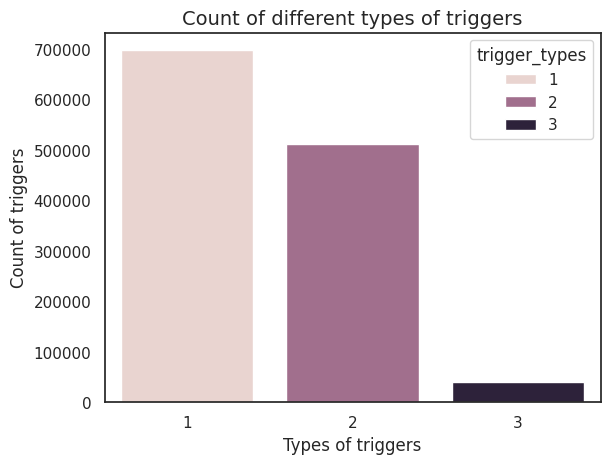

In [ ]:
# Посмотрим для начала на распределение типов триггеров
data_fr = {'trigger_types': [1, 2, 3],
           'trigger_count': [len(df_totest.filter(pl.col('type').list.contains(i))) for i in range(1, 4)]}
filter_types = pl.DataFrame(data_fr)
sns.barplot(x=filter_types['trigger_types'],
            y=filter_types['trigger_count'],
            hue=filter_types['trigger_types'])
plt.xlabel('Types of triggers')
plt.ylabel('Count of triggers')
plt.title('Count of different types of triggers', fontsize=14)

Превалирует первый триггер, в то время как кол-во третьего  < 5%

In [ ]:
# Посмотрим также на распределение положительных ответов в зависимости от наличия того или иного типа триггера у юзеров
trig_result = {'positive_class_count': [len(df_totest.filter((pl.col('type').list.contains(i)) & (pl.col('target') == 1))) for i in range(1, 4)],
               'trigg_type': [1, 2, 3],
               'percent_of_positive': [len(df_totest.filter((pl.col('type').list.contains(i)) & (pl.col('target') == 1))) \
                                       / len(df_totest.filter(pl.col('target') == 1)) for i in range(1, 4)]}


trig_result = pl.DataFrame(data=trig_result)

trig_result

positive_class_count,trigg_type,percent_of_positive
i64,i64,f64
8336,1,0.780451
9274,2,0.868271
1919,3,0.179665


2 тип триггеров присутствует у 86% процентов пользователей, которые заинтересовались предложением. Используем эту информацию при feature engineering (и при отборе пользователей, с которыми мы будем взаимодействовать)




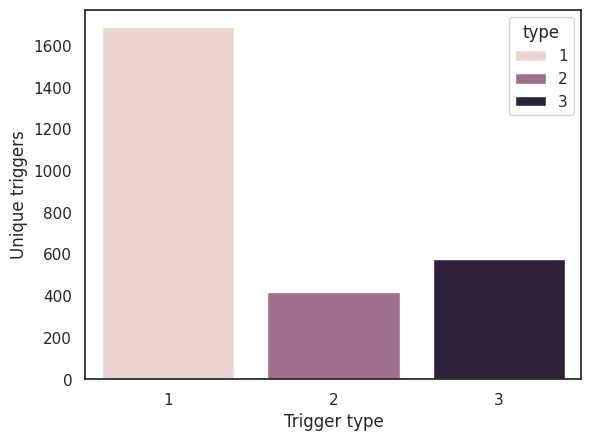

In [ ]:
# Посмотрим также на количество триггеров каждого из трех типов

trig_type = df_triggers.group_by('type').n_unique()
trig_type

sns.barplot(x=trig_type['type'],
            y=trig_type['trigger'],
            hue=trig_type['type'])

plt.xlabel('Trigger type')
plt.ylabel('Unique triggers');

Триггер 2-го типа является самым малочисленным (по кол-ву уникальных значений триггеров), однако его взаимодействие с пользователем повлияло на положительное решение в 86% случаев при последующем контакте с пользователем

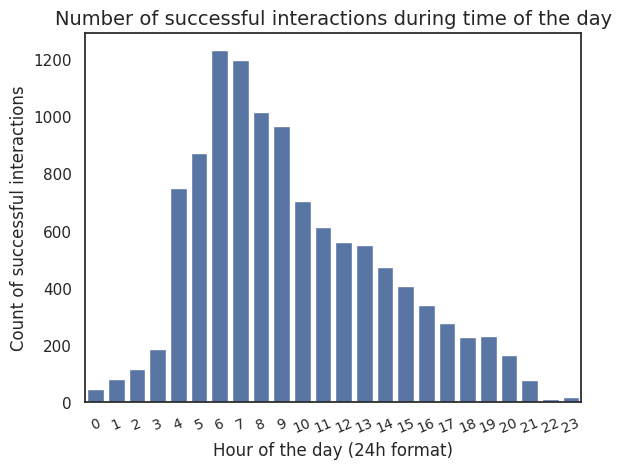

In [ ]:
# Проверим, в какое время суток пользователи чаще положительно отвечают на взаимодействие

df_actions_hour = df_actions.with_columns(hour=pl.col('date').dt.hour())


sns.countplot(
    data=df_actions_hour.filter(pl.col('result') == 1),
    x='hour',
    fill=True,
    legend='auto'
)
plt.xticks(rotation=23, size=10)
plt.yticks(size=11)
plt.xlabel('Hour of the day (24h format)')
plt.ylabel('Count of successful interactions')
plt.title('Number of successful interactions during time of the day', fontsize=14);

Заметно, что распределение ассиметрично, можем наблюдать, что большая часть положительных взаимодействий с пользователями происходит в утреннее время, в диапазоне с 4 до 12 часов дня (с пиком в 6 часов утра. Эти исторические данные можно использовать для формирования плана взаимодействия с пользователями.

In [ ]:
# Проверим также, есть ли пользователи, с которыми положительно провзаимодействовали более 1 раза за месяц
len(df_totest.filter(pl.col('target') == 1))
print("Number of users that responded positively more than once during the month: {}".format(
    len(df_actions_hour.filter(pl.col('result') == 1)) - len(df_totest.filter(pl.col('target') == 1))
))

Number of users that responded positively more than once during the month: 457


In [ ]:
# Посмотрим, что это за пользователи

df_action_grouped = df_actions.group_by('guid').agg(pl.col('result'))
df_action_grouped = df_action_grouped.filter((pl.col('result').list.len() > 1) & (pl.col('result') == [1, 1]) |
                                             (pl.col('result').list.len() > 1) & (pl.col('result') == [1, 1, 1]))

df_action_grouped

guid,result
str,list[i32]
"""01879bfd-3087-167d-5a47-dcf409…","[1, 1]"
"""01878fa0-f87b-0f19-458d-673603…","[1, 1]"
"""018e9a3b-3636-88d6-bd59-4a9e1e…","[1, 1]"
"""01879299-f02a-eaa3-e478-df8473…","[1, 1]"
"""018be0c4-521d-df8b-f217-9363d5…","[1, 1]"
…,…
"""0187a473-54a9-e126-a255-526658…","[1, 1]"
"""0187a468-77ef-0e11-3068-4eada2…","[1, 1]"
"""018785fc-ac1a-43b4-7319-c29930…","[1, 1]"


In [ ]:
# Соединим их с таблицей триггеров и посмотрим на распределение типов триггеров/их номеров
df_action_to_plot = df_action_grouped.join(
    df_triggers,
    how='inner',
    on='guid'
)

trigg_types_count = {'trigg_count': [len(df_action_to_plot.filter(pl.col('type') == i)) for i in range(1, 4)],
                     'trigg_type': [1, 2, 3]}

df_of_trigs = pl.DataFrame(trigg_types_count)
df_of_trigs

trigg_count,trigg_type
i64,i64
200152,1
45023,2
649,3


In [ ]:
# Проверим, сколько в среднем триггеров срабатывало за месяц у пользователей, которые дали положительный ответ более 1 раза

df_action_to_plot.group_by('guid').agg(pl.col('type')).with_columns(list_len=pl.col('type').list.len()).sort('list_len', descending=True).describe()



statistic,guid,type,list_len
str,str,f64,f64
"""count""","""426""",426.0,426.0
"""null_count""","""0""",0.0,0.0
"""mean""",null,null,577.051643
"""std""",null,null,1290.141518
"""min""","""018783bf-fee2-0048-ea84-62e50f…",null,2.0
"""25%""",null,null,59.0
"""50%""",null,null,173.0
"""75%""",null,null,513.0
"""max""","""018f0b6f-eafe-cdc7-784b-fb832d…",null,11721.0


В среднем у пользователей, которые дали положительный ответ более 1 раза, триггеры срабатывали ~600 раз за месяц (однако среднеквадратичное отклонение в этом случае достаточно высоко, так как пользователей слишком мало)

In [ ]:
# Проверим также описательные статистики для всех пользователей, кто дал положительный ответ
# Затем данные по количеству триггеров можно будет использовать для бейзлайн модели по выявлению пользователей, с кем нужно взаимодействовать

reach_out_users = df_actions.filter(pl.col('result') == 1).join(
    df_triggers,
    on='guid',
    how='inner'
).sort(by='date_right', descending=False)

reach_out_users.group_by('guid').len().describe()


statistic,guid,len
str,str,f64
"""count""","""10681""",10681.0
"""null_count""","""0""",0.0
"""mean""",null,302.999813
"""std""",null,1050.303414
"""min""","""018783be-2086-fcd1-f986-100d4c…",1.0
"""25%""",null,13.0
"""50%""",null,54.0
"""75%""",null,217.0
"""max""","""018fd018-caea-d660-4f15-b0c36d…",36390.0


У всех пользователей среднее число срабатывания тригерров равно 303, однако статистики были посчитаны за весь период в месяц, что слегка искажает полученный результат, учитывая то, что с пользователем можно взаимодействовать лишь один раз в две недели

In [ ]:
# Проверим, существует ли взаимосвязь между общим количеством триггеров и количеством уникальных триггеров

# sort the triggers df by date
df_triggers_dt_sorted = df_triggers.sort(by='date', descending=False)
df_triggers_date_sort = df_triggers_dt_sorted.with_columns(day=pl.col('date').dt.day())

# sort the actions df by date
df_actions_dt_sorted = df_actions.sort(by='date', descending=False)
df_actions_date_sort = df_actions_dt_sorted.with_columns(day=pl.col('date').dt.day())

# возьмем данные за первые 4 дня
df_trig_dt_sorted = df_triggers_date_sort.filter(pl.col('day') < 4)
df_act_dt_sorted = df_actions_date_sort.filter(pl.col('day') < 4)


df_trig_datetime_sorted = df_trig_dt_sorted.group_by('guid').agg(pl.col('trigger').n_unique(), pl.col('type')).with_columns(triggers_involved=pl.col('type').list.len())

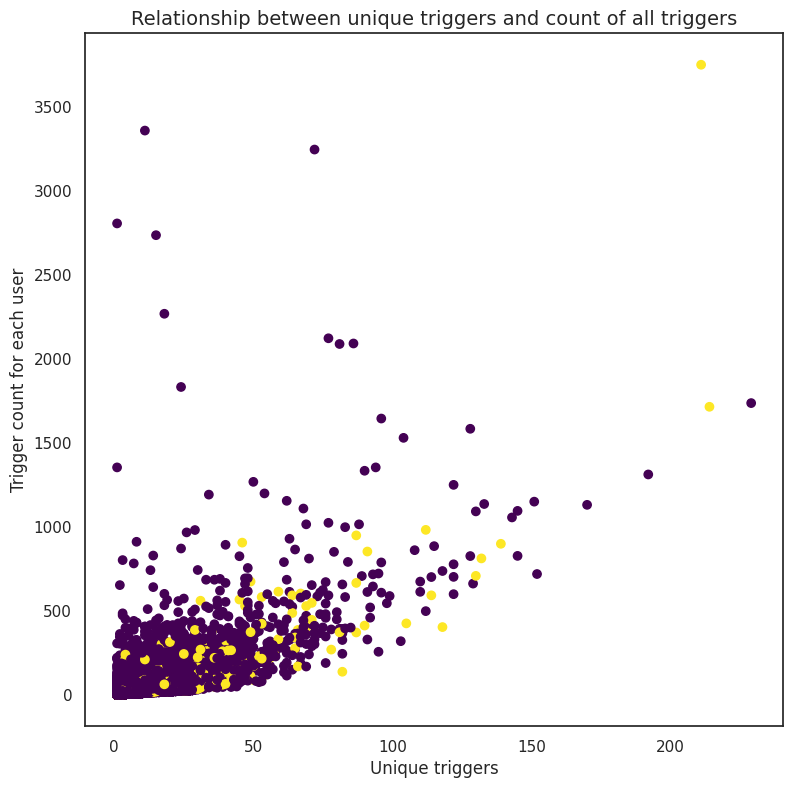

In [ ]:
# объединим оба датасета и посмотрим, есть ли взаимосвязь между кол-вом уникальных триггеров и общим количеством триггеров (и целевой переменной)

df_trig_to_plot = df_trig_datetime_sorted.join(
    df_act_dt_sorted,
    how='inner',
    on='guid'
)

plt.figure(figsize=(9, 9))

plt.scatter(
    x=df_trig_to_plot['trigger'],
    y=df_trig_to_plot['triggers_involved'],
    c=df_trig_to_plot['result'],
    cmap='viridis'
)
plt.title('Relationship between unique triggers and count of all triggers', fontsize=14)
plt.xlabel('Unique triggers')
plt.ylabel('Trigger count for each user');

### Ключевые инсайты после разведочного анализа данных:
1. Пользователи, у которых за месяц было взаимодействие с триггером 2 типа имеют больший шанс положительно ответить на взаимодействие
2. Распределение времени успешных взаимодействий ассиметрично, есть тенденция, что взаимодействовать с пользователями в период с 4 до 12 часов дня - наиболее подходяще с точки зрения получения положительного ответа
3. 50 % пользователей с положительным взаимодействием находятся в диапазоне от 13 до 217 срабатываний триггеров за месяц
4. Нет линейной взаимосвязи между количеством уникальных триггеров, сработавших у пользователя и общим числом триггеров пользователя
5. Некоторые пользователи из actions.csv отсутствуют в датасете triggers.csv


(upd. 19:00 28.10.24; появилась информация, что type триггеров - это действия пользователя)


#### После тестирования различных моделей лучший результат показал бустинг из пакета XGBoost

- так как наблюдается достаточно сильный дизбаланс классов, то `scale_pos_weight` был выбран равным 100
- разбиение проводил скользящим окном с указанием ширины окна по дням (с накоплением дней, то есть с добавлением значений фичей)
- выборка со сгенерированными фичами была едва ли разделима - максимальный precision был 0.04 (был опробирован подход с random fourier features, но он не дал прироста по метрикам)
- следовало также потестить гипотезу о том, что пользователи с наибольшим количеством триггеров 2 типа чаще относятся к положительному классу
- некоторые гипотезы не были опробированы ввиду недостатка времени

Питоновский скрипт пайплайна pipeline.py подразумевает импорт двух датасетов с указанием ширины скользящего окна для сплита по времени